In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# One vs all (one vs the rest)


Es una estrategia que puede ser usada para resolver problemas multi-clase a partir de modelos bi-clase o para resolver problemas multi-label. Consiste en construir un clasificador $C_i$ por cada clase existente en el problema que separe la clase $i$ del resto. En la fase de predicción, para problemas multi-clase, una vez se obtienen los resultados por cada clasificador se debe realizar un proceso de concenso para determinar la clase única a la que pertenece la muestra evaluada; para problemas multi-etiqueta, cada clasificador individual $C_i$ tiene la capacidad de decidir si la muestra evaluada pertenece o no a la clase $i$.

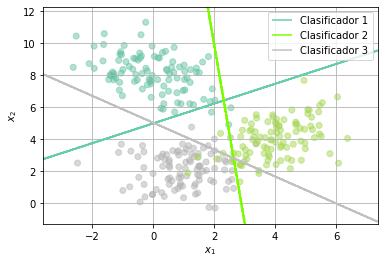

In [80]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
N = 100
Cov = np.identity(2) * 1.1
Cov2 = np.array([[1.1,0.5],[0.5,1.1]])
Cov3 = np.array([[1.1,-0.5],[-0.5,1.1]])
Mean = [1.1,2.1]
Mean2 = [4.1,4.1]
Mean3 = [0,8]
x, y  = np.random.multivariate_normal(Mean, Cov, N).T
x2, y2  = np.random.multivariate_normal(Mean2, Cov2, N).T
x3, y3  = np.random.multivariate_normal(Mean3, Cov3, N).T
X = np.r_[np.c_[x,y],np.c_[x2,y2],np.c_[x3,y3]]
Y = np.r_[2*np.ones((N,1)),np.ones((N,1)),np.zeros((N,1))]

h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
plt.scatter(X[:,0],X[:,1],c=Y.flatten(), cmap='Set2',alpha=0.5)
cs=[]
h=[]
m_cmap = ['mediumaquamarine','lawngreen','silver']

for i in range(3):
    Ytrain = Y.copy()
    Ytrain[Y==i] = 1
    Ytrain[Y!=i] = 0
    clf = LinearDiscriminantAnalysis()
    clf.fit(X,Ytrain.flatten())
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    cs.append(plt.contour(xx, yy, Z, colors=m_cmap[i]))
    temp,_ =cs[i].legend_elements()
    h.append(temp)
plt.legend([h[0][0], h[1][0], h[2][0]], ['Clasificador 1','Clasificador 2', 'Clasificador 3'])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()

Ahora usando la clase OneVsRestClassifier

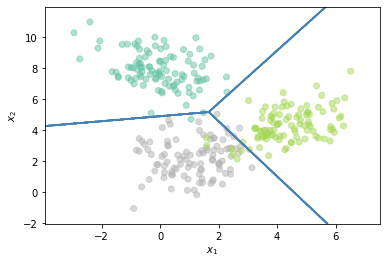

In [59]:
from sklearn.multiclass import OneVsRestClassifier
Z = OneVsRestClassifier(LinearDiscriminantAnalysis()).fit(X, Y).predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.scatter(X[:,0],X[:,1],c=Y.flatten(), cmap='Set2',alpha=0.5)
plt.contour(xx, yy, Z, colors='steelblue')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

Los clasificadores base pueden ser de cualquier tipo, por lo que las fronteras no tienen que ser lineales.

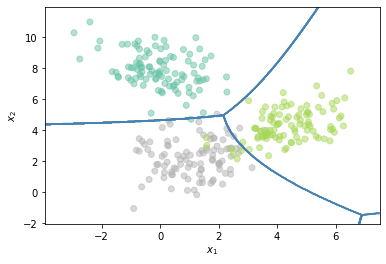

In [65]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Z = OneVsRestClassifier(QuadraticDiscriminantAnalysis()).fit(X, Y).predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.scatter(X[:,0],X[:,1],c=Y.flatten(), cmap='Set2',alpha=0.5)
plt.contour(xx, yy, Z, colors='steelblue')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

El número de clasificadores $N_e$ que deben ser entrenados es igual al número de clases $N_c$. Como desventaja es importante tener en cuenta que muy posiblemente cada clasificador se entrene sobre una base de datos desbalanceada, por lo que es necesario tener en cuenta medidas correctivas a ese respecto.

## Ejemplo de unproblema Multi-etiqueta (Multi-label) 

Base de datos y librerías: **Nota** Vamos a usar la clase Pipline.

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer

X_train = np.array(["new york is a hell of a town",
                    "new york was originally dutch",
                    "the big apple is great",
                    "new york is also called the big apple",
                    "nyc is nice",
                    "people abbreviate new york city as nyc",
                    "the capital of great britain is london",
                    "london is in the uk",
                    "london is in england",
                    "london is in great britain",
                    "it rains a lot in london",
                    "london hosts the british museum",
                    "new york is great and so is london",
                    "i like london better than new york"])
y_train_text = [["new york"],["new york"],["new york"],["new york"],["new york"],
                ["new york"],["london"],["london"],["london"],["london"],
                ["london"],["london"],["new york","london"],["new york","london"]]

X_test = np.array(['nice day in nyc',
                   'welcome to london',
                   'london is rainy',
                   'it is raining in britian',
                   'it is raining in britian and the big apple',
                   'it is raining in britian and nyc',
                   'hello welcome to new york. enjoy it here and london too'])
target_names = ['New York', 'London']

In [60]:
mlb = MultiLabelBinarizer()
Yt = mlb.fit_transform(y_train_text)

In [61]:
Yt

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1]])

In [62]:
classifier = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', OneVsRestClassifier(LinearSVC()))])

classifier.fit(X_train, Yt)
predicted = classifier.predict(X_test)
all_labels = mlb.inverse_transform(predicted)

for item, labels in zip(X_test, all_labels):
    print('{0} => {1}'.format(item, ', '.join(labels)))

nice day in nyc => new york
welcome to london => london
london is rainy => london
it is raining in britian => london
it is raining in britian and the big apple => new york
it is raining in britian and nyc => london, new york
hello welcome to new york. enjoy it here and london too => london, new york


In [56]:
predicted

array([[0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 1],
       [1, 1]])

# One vs One (All vs All)

Es otra estrategia para resolver un problema multi-clase a partir de clasificadores binarios. En este caso la estrategia consiste en entrenar un clasificador por cada par de clases. En la fase de predicción la clase que reciba un número mayor de votos es la seleccionada.

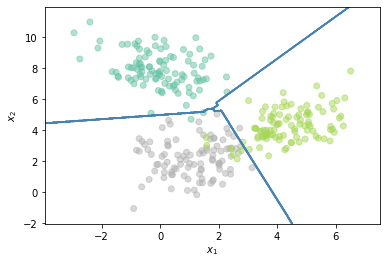

In [64]:
from sklearn.multiclass import OneVsOneClassifier
Z = OneVsOneClassifier(LinearDiscriminantAnalysis()).fit(X, Y.flatten()).predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.scatter(X[:,0],X[:,1],c=Y.flatten(), cmap='Set2',alpha=0.5)
plt.contour(xx, yy, Z, colors='steelblue')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

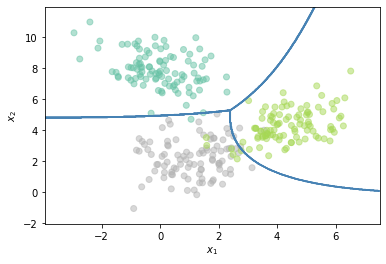

In [67]:
Z = OneVsOneClassifier(QuadraticDiscriminantAnalysis()).fit(X, Y.flatten()).predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.scatter(X[:,0],X[:,1],c=Y.flatten(), cmap='Set2',alpha=0.5)
plt.contour(xx, yy, Z, colors='steelblue')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

El número de clasificadores que es necesario entrenar en este caso es igual a:

$$N_e = \frac{N_c * (N_c - 1)}{2}$$

# Clasificación jerárquica


Es también una estrategia para resolver problemas de clasificación multiclase con base en clasificadores binarios. En este caso para resolver el problema es necesario definir una estructura de árbol y organizar las clases de tal manera que en cada nodo del arbol se realicen clasificaciones entre dos posibles grupos, hasta llegar a diferenciar todas las clases de manera individual. El siguiente diagrama nos ayuda a aclarar la idea:

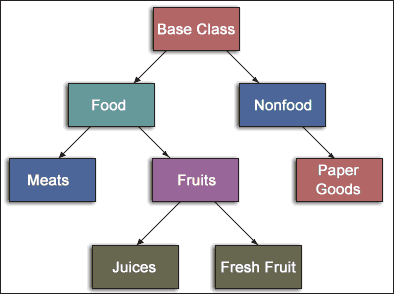

In [69]:
from IPython.display import Image
Image("local/imgs/NDmyl.gif", width = 400, height = 200)

El problema fundamental es que el orden de jerárquia debe ser decidio manualmente a partir del conocimiento que se tiene sobre el problema. El número de clasificadores en este caso es igual a $N_e = N_c -1$

sklearn no cuenta con una implementación para esta estrategia pero se pueden encontrar algunas implementaciones que siguen la misma interfaz de sklearn, aunque no funcionan para cualquier estimador base. A continuación vamos a usar la implementación disponible en el repositorio [link](https://github.com/globality-corp/sklearn-hierarchical-classification). 

In [ ]:
!pip install sklearn-hierarchical-classification

In [86]:
from sklearn_hierarchical_classification.classifier import HierarchicalClassifier
from sklearn_hierarchical_classification.constants import ROOT
from sklearn import svm

r"""Test that a nontrivial hierarchy leaf classification behaves as expected.
    We build the following class hierarchy along with data from the handwritten digits dataset:
            <ROOT>
           /      \
          A        B
         / \       |  \
        1   7      C   9
                 /   \
                3     8

    class_hierarchy = {
        ROOT: ["A", "B"],
        "A": ["1", "7"],
        "B": ["C", "9"],
        "C": ["3", "8"],
    }

"""
    
class_hierarchy = {
    ROOT: ['0', 'A'],
    'A': ['1', '2'],
}

clf_b = svm.SVC(gamma=0.001,kernel="rbf",probability=True)

clf = HierarchicalClassifier(
    base_estimator=clf_b,
    class_hierarchy=class_hierarchy)

# cast the targets to strings so we have consistent typing of labels across hierarchy
Y2 = Y.copy()
Y2 = Y2.astype(int).astype(str)


clf.fit(X, Y2.flatten())
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

/home/julian/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


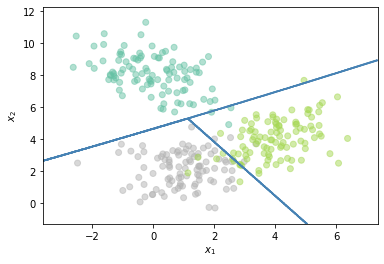

In [92]:
Z = Z.data.astype(int).reshape(xx.shape)
plt.scatter(X[:,0],X[:,1],c=Y.flatten(), cmap='Set2',alpha=0.5)
plt.contour(xx, yy, Z, colors='steelblue')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()